# Analyzing hate crimes trends for Austin against the USA as a whole, 2017 - Present

## Data Wrangling & Cleaning

I've been working, off and on, on this project for since about January 2020. One-half practice, one-half because I want to try and contribute to making sense of the chaos that is our world right now. What I intend is to analyze hate crimes trends for Austin, TX against the USA as a whole from 2017 to the present, with particular focus on the LGBT Community. 

I am using data provided by Austin PD in this notebook, and in the next 2, or 3 notebooks as well. For now, I am focusing solely on data for Austin. I will get into broader data for the USA later down the road.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

aus_17 = pd.read_csv('https://data.austintexas.gov/resource/79qh-wdpx.csv')
display(aus_17.head())
print('----------------------------------')
display(aus_17.dtypes)

,month,incident_number,date_of_incident_day_of_week,number_of_vitims_under_18,number_of_victims_over_18,number_of_offenders_under_18,number_of_offenders_over_18,race_or_ethnic_of_offender,offense,offense_location,bias,victim_type
0,January,2017-241137,01/01/2017/Sun,0,1,0,1,White/Not Hispanic,Aggravated Assault,Park/Playground,Anti-Black or African American,Individual
1,February,2017-580344,02/01/2017/Wed,0,1,0,1,Black or African American/Not Hispanic,Aggravated Assault,Highway/Road/Alley/Street/Sidewalk,Anti-White,Individual
2,March,2017-800291,03/21/2017/Tues,0,0,0,0,Unknown,Destruction,Highway/Road/Alley/Street/Sidewalk,Anti-Jewish,Other
3,April,2017-1021534,04/12/2017/Wed,0,0,0,0,White/Unknown,Simple Assault,Air/Bus/Train Terminal,Anti-Jewish,Individual
4,May,2017-1351550,05/15/2017/Mon,1,0,1,2,White/Not Hispanic,Simple Assault,Residence/Home,Anti-Gay (Male),Individual


----------------------------------


month                           object
incident_number                 object
date_of_incident_day_of_week    object
number_of_vitims_under_18        int64
number_of_victims_over_18        int64
number_of_offenders_under_18     int64
number_of_offenders_over_18      int64
race_or_ethnic_of_offender      object
offense                         object
offense_location                object
bias                            object
victim_type                     object
dtype: object

I dislike the Socrata method bc it imports all data in all columns as objects...importing the data using the url method leaves the column data intact so will make my job much easier down the road. 

### First glance...
As I stated previously, my goal is to analyze trends over time. In particular, I want to focus on how hate crime affects the LGBT community. Initially speaking, most of these columns will be unnecessary for my purposes so I suspect we'll be removing most of them. 

In [2]:
# Loading the datasets for '18, '19, and this year
aus_18 = pd.read_csv('https://data.austintexas.gov/resource/idj2-d9th.csv')
aus_19 = pd.read_csv('https://data.austintexas.gov/resource/e3qf-htd9.csv')
aus_20 = pd.read_csv('https://data.austintexas.gov/resource/vc9m-ha4y.csv')

In [3]:
# Concatenating the datasets
aus_final = pd.concat([aus_17, aus_18, aus_19, aus_20], sort=False, axis=0)

# Exploring the concatenated set
display(aus_final.head())
print('----------------------------------')
display(aus_final.tail())
print('----------------------------------')
display(aus_final.isnull().sum())

,month,incident_number,date_of_incident_day_of_week,number_of_vitims_under_18,number_of_victims_over_18,number_of_offenders_under_18,number_of_offenders_over_18,race_or_ethnic_of_offender,offense,offense_location,...,victim_type,race_ethnic_of_offender_s,offense_s,date_of_incident,day_of_week,number_of_victims_under_18,number_of_offenders_under,number_of_offenders_over,race_ethnicity_of_offenders,notes
0,January,2017-241137,01/01/2017/Sun,0.0,1,0.0,1.0,White/Not Hispanic,Aggravated Assault,Park/Playground,...,Individual,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,February,2017-580344,02/01/2017/Wed,0.0,1,0.0,1.0,Black or African American/Not Hispanic,Aggravated Assault,Highway/Road/Alley/Street/Sidewalk,...,Individual,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,March,2017-800291,03/21/2017/Tues,0.0,0,0.0,0.0,Unknown,Destruction,Highway/Road/Alley/Street/Sidewalk,...,Other,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,April,2017-1021534,04/12/2017/Wed,0.0,0,0.0,0.0,White/Unknown,Simple Assault,Air/Bus/Train Terminal,...,Individual,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,May,2017-1351550,05/15/2017/Mon,1.0,0,1.0,2.0,White/Not Hispanic,Simple Assault,Residence/Home,...,Individual,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


----------------------------------


,month,incident_number,date_of_incident_day_of_week,number_of_vitims_under_18,number_of_victims_over_18,number_of_offenders_under_18,number_of_offenders_over_18,race_or_ethnic_of_offender,offense,offense_location,...,victim_type,race_ethnic_of_offender_s,offense_s,date_of_incident,day_of_week,number_of_victims_under_18,number_of_offenders_under,number_of_offenders_over,race_ethnicity_of_offenders,notes
2,March,2020-5011788,NaN,NaN,1,NaN,NaN,NaN,NaN,Residence/Home,...,NaN,NaN,Criminal Mischief,2020-03-22T00:00:00.000,Sunday,0.0,0.0,0.0,Unknown,NaN
3,April,2020-5015689,NaN,NaN,1,NaN,NaN,NaN,NaN,Church/Synagogue/Temple/Mosque,...,NaN,NaN,Criminal Mischief,2020-04-20T00:00:00.000,Monday,0.0,0.0,0.0,Unknown,NaN
4,April,2020-5016804,NaN,NaN,1,NaN,NaN,NaN,NaN,Department/Discount Store,...,NaN,NaN,Assault by Threat,2020-04-29T00:00:00.000,Wednesday,0.0,0.0,1.0,Black/Non-Hispanic,NaN
5,May,2020-1381131,NaN,NaN,1,NaN,NaN,NaN,NaN,Convenience Store,...,NaN,NaN,Assault by Contact,2020-05-17T00:00:00.000,Sunday,0.0,0.0,1.0,White/Non-Hispanic,NaN
6,May,2020-1410411,NaN,NaN,1,NaN,NaN,NaN,NaN,Streets/Highway/Road/Alley,...,NaN,NaN,Assault with Injury,2020-05-20T00:00:00.000,Wednesday,0.0,0.0,1.0,White/Non-Hispanic,NaN


----------------------------------


month                            0
incident_number                  0
date_of_incident_day_of_week    19
number_of_vitims_under_18       19
number_of_victims_over_18        0
number_of_offenders_under_18    19
number_of_offenders_over_18     19
race_or_ethnic_of_offender      38
offense                         38
offense_location                 0
bias                             0
victim_type                     19
race_ethnic_of_offender_s       36
offense_s                       17
date_of_incident                36
day_of_week                     36
number_of_victims_under_18      36
number_of_offenders_under       36
number_of_offenders_over        36
race_ethnicity_of_offenders     36
notes                           53
dtype: int64

We can still go a bit farther in the cleaning process:

1. The 'incident_number' column can be split along the '-' -- we can name a new 'year' column and convert it into datetime, and we can create a new 'incident_number' column. 
2. There are various descriptions in the 'bias' column that can be categorized into one variable as 'anti-lgbt.' Let's see what we can do with these. 
3. Also, we can convert the 'bias' column into a category type.

What I want to do now is split the 'incident_number' column along the '-' because the #s before the '-' clearly indicate the year the incident takes place, which I want to merge with the corresponding months in the 'month' column, and keep the numbers after the '-' as the 'incident_number.' 

In [4]:
# It took me a few tries but I think I finally got it figured out! Now for the final push! Let's pray everybody! :P 
new = aus_final["incident_number"].str.split("-", n = 1, expand = True)
aus_final["year"]= new[0]
aus_final["occurence_number"]= new[1]
aus_final.drop(columns =["incident_number"], inplace = True)
aus_final['date'] = aus_final[['month', 'year']].agg('-'.join, axis=1)
aus_final.drop(['month', 'occurence_number', 'year'], axis=1, inplace=True)
aus_final = aus_final[['date', 'bias', 'number_of_victims_over_18', 'offense_location']]
aus_final.rename(columns={'number_of_victims_over_18': 'victims'}, inplace=True)
aus_final['date'] = pd.to_datetime(aus_final['date'])
aus_final.set_index('date', inplace=True)

# Showing the final product
display(aus_final.head())
print('----------------------------------')
display(aus_final.tail())
print('----------------------------------')
display(aus_final.isnull().sum())
print('----------------------------------')
display(aus_final.describe())
print('----------------------------------')
display(aus_final.columns)
print('----------------------------------')
display(aus_final.index)

,bias,victims,offense_location
date,,,
2017-01-01,Anti-Black or African American,1,Park/Playground
2017-02-01,Anti-White,1,Highway/Road/Alley/Street/Sidewalk
2017-03-01,Anti-Jewish,0,Highway/Road/Alley/Street/Sidewalk
2017-04-01,Anti-Jewish,0,Air/Bus/Train Terminal
2017-05-01,Anti-Gay (Male),0,Residence/Home


----------------------------------


,bias,victims,offense_location
date,,,
2020-03-01,Anti-Gay (Male); Anti-Jewish,1,Residence/Home
2020-04-01,Anti-Buddhist,1,Church/Synagogue/Temple/Mosque
2020-04-01,Anti-Gay (Male); Anti-Transgender,1,Department/Discount Store
2020-05-01,Anti-Black or African American,1,Convenience Store
2020-05-01,Anti-Hispanic or Latino,1,Streets/Highway/Road/Alley


----------------------------------


bias                0
victims             0
offense_location    0
dtype: int64

----------------------------------


,victims
count,55.000000
mean,0.909091
std,0.397805
min,0.000000
25%,1.000000
50%,1.000000
75%,1.000000
max,2.000000


----------------------------------


Index(['bias', 'victims', 'offense_location'], dtype='object')

----------------------------------


DatetimeIndex(['2017-01-01', '2017-02-01', '2017-03-01', '2017-04-01',
               '2017-05-01', '2017-06-01', '2017-06-01', '2017-06-01',
               '2017-07-01', '2017-07-01', '2017-07-01', '2017-07-01',
               '2017-10-01', '2017-10-01', '2017-11-01', '2017-11-01',
               '2017-11-01', '2018-01-01', '2018-01-01', '2018-02-01',
               '2018-02-01', '2018-03-01', '2018-03-01', '2018-03-01',
               '2018-04-01', '2018-04-01', '2018-05-01', '2018-06-01',
               '2018-06-01', '2018-08-01', '2018-08-01', '2018-09-01',
               '2018-09-01', '2018-10-01', '2018-10-01', '2018-12-01',
               '2019-01-01', '2019-01-01', '2019-02-01', '2019-03-01',
               '2019-04-01', '2019-06-01', '2019-08-01', '2019-08-01',
               '2019-08-01', '2019-11-01', '2019-12-01', '2019-12-01',
               '2020-03-01', '2020-03-01', '2020-03-01', '2020-04-01',
               '2020-04-01', '2020-05-01', '2020-05-01'],
              dtype

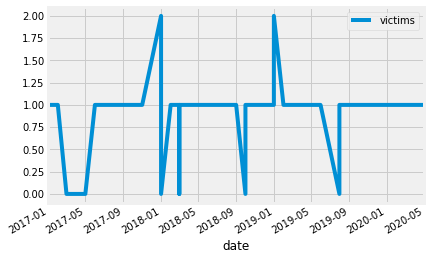

In [5]:
aus_final.plot()
plt.show()

Anti-Black or African American       0.181818
Anti-Gay (Male)                      0.181818
Anti-Black                           0.145455
Anti-Jewish                          0.054545
Anti-White                           0.054545
Anti-Hispanic                        0.054545
Anti-Hispanic or Latino              0.054545
Anti-Transgender                     0.036364
Anti-Gay (Male); Anti-Transgender    0.036364
Anti-Islamic (Muslim)                0.036364
Anti-Gay                             0.036364
Anti-Lesbian                         0.018182
Anti-Disability                      0.018182
Anti-Hispanic/Latino                 0.018182
Anti-Islamic(Muslim)                 0.018182
Anti-Arab                            0.018182
Anti-Buddhist                        0.018182
Anti-Gay (Male); Anti-Jewish         0.018182
Name: bias, dtype: float64


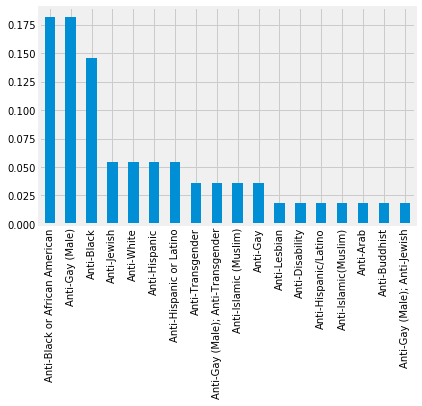

In [8]:
bias = aus_final.bias.value_counts(normalize=True)
print(bias)
bias.plot.bar()
plt.show()